In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. 데이터 가져오기

### sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
### diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [28]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
type(diabetes)

sklearn.utils.Bunch

In [29]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [30]:
df_x = diabetes['data']
df_y = diabetes['target']

df_x.shape, df_y.shape

((442, 10), (442,))

In [31]:
type(df_x), type(df_y)

(numpy.ndarray, numpy.ndarray)

In [32]:
df_x = diabetes.data
df_y = diabetes.target

df_x.shape, df_y.shape

((442, 10), (442,))

In [33]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## 2) 모델에 입력할 데이터 X 준비하기

### df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [34]:
type(df_x)

numpy.ndarray

## (3) 모델에 예측할 데이터 y 준비하기

### df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [35]:
type(df_x), type(df_y)

(numpy.ndarray, numpy.ndarray)

## 4. train 데이터와 test 데이터로 분리하기

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

In [38]:
df_x.shape, x_train.shape, x_test.shape

((442, 10), (353, 10), (89, 10))

## 5. 모델 준비하기

### 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
### 모델 함수를 구현해주세요.

In [39]:
W = np.random.rand(10)
b = np.random.rand()
W, b

(array([0.68876595, 0.61104104, 0.58047296, 0.4561323 , 0.77374617,
        0.99505426, 0.83062222, 0.67984123, 0.35585742, 0.91148983]),
 0.10313500434231682)

In [40]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## 6. 손실함수 loss 정의하기

### 손실함수를 MSE 함수로 정의해주세요.

In [41]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [42]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## 7.기울기를 구하는 gradient 함수 구현하기

### 기울기를 계산하는 gradient 함수를 구현해주세요.

def gradient(x,w,b,y):
    delta = 0.0001
    dw = (loss(x, w+delta, b, y) - loss(x, w, b, y))/delta
    db = (loss(x, w, b+delta, y) - loss(x, w, b, y))/delta
    return dw, db

In [43]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## 8.하이퍼 파라미터인 학습률 설정하기

### 학습률, learning rate 를 설정해주세요
### 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [44]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.01

## 9. 모델 학습하기

### 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
### loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
### 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [45]:
dW, db = gradient(df_x, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.36769601 -0.30995633 -4.28755767 -3.22526181 -1.53954965 -1.26225242
  2.88845715 -3.14225926 -4.13501417 -2.7909945 ]
db: -304.0606983171072


In [55]:
losses = []

for i in range(1, 200001):
    dW, db = gradient(x_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(x_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4872.9514
Iteration 20 : Loss 4868.6692
Iteration 30 : Loss 4864.3995
Iteration 40 : Loss 4860.1425
Iteration 50 : Loss 4855.8980
Iteration 60 : Loss 4851.6660
Iteration 70 : Loss 4847.4465
Iteration 80 : Loss 4843.2394
Iteration 90 : Loss 4839.0447
Iteration 100 : Loss 4834.8624
Iteration 110 : Loss 4830.6923
Iteration 120 : Loss 4826.5345
Iteration 130 : Loss 4822.3889
Iteration 140 : Loss 4818.2554
Iteration 150 : Loss 4814.1341
Iteration 160 : Loss 4810.0249
Iteration 170 : Loss 4805.9278
Iteration 180 : Loss 4801.8427
Iteration 190 : Loss 4797.7695
Iteration 200 : Loss 4793.7083
Iteration 210 : Loss 4789.6589
Iteration 220 : Loss 4785.6214
Iteration 230 : Loss 4781.5957
Iteration 240 : Loss 4777.5818
Iteration 250 : Loss 4773.5796
Iteration 260 : Loss 4769.5891
Iteration 270 : Loss 4765.6103
Iteration 280 : Loss 4761.6431
Iteration 290 : Loss 4757.6874
Iteration 300 : Loss 4753.7433
Iteration 310 : Loss 4749.8107
Iteration 320 : Loss 4745.8895
Iteration 330 : L

Iteration 3170 : Loss 3976.4418
Iteration 3180 : Loss 3974.6368
Iteration 3190 : Loss 3972.8363
Iteration 3200 : Loss 3971.0402
Iteration 3210 : Loss 3969.2486
Iteration 3220 : Loss 3967.4615
Iteration 3230 : Loss 3965.6788
Iteration 3240 : Loss 3963.9005
Iteration 3250 : Loss 3962.1266
Iteration 3260 : Loss 3960.3571
Iteration 3270 : Loss 3958.5920
Iteration 3280 : Loss 3956.8312
Iteration 3290 : Loss 3955.0748
Iteration 3300 : Loss 3953.3228
Iteration 3310 : Loss 3951.5750
Iteration 3320 : Loss 3949.8316
Iteration 3330 : Loss 3948.0925
Iteration 3340 : Loss 3946.3576
Iteration 3350 : Loss 3944.6270
Iteration 3360 : Loss 3942.9007
Iteration 3370 : Loss 3941.1786
Iteration 3380 : Loss 3939.4608
Iteration 3390 : Loss 3937.7472
Iteration 3400 : Loss 3936.0377
Iteration 3410 : Loss 3934.3325
Iteration 3420 : Loss 3932.6314
Iteration 3430 : Loss 3930.9345
Iteration 3440 : Loss 3929.2418
Iteration 3450 : Loss 3927.5532
Iteration 3460 : Loss 3925.8687
Iteration 3470 : Loss 3924.1883
Iteratio

Iteration 5790 : Loss 3623.0757
Iteration 5800 : Loss 3622.0807
Iteration 5810 : Loss 3621.0878
Iteration 5820 : Loss 3620.0970
Iteration 5830 : Loss 3619.1082
Iteration 5840 : Loss 3618.1214
Iteration 5850 : Loss 3617.1366
Iteration 5860 : Loss 3616.1539
Iteration 5870 : Loss 3615.1731
Iteration 5880 : Loss 3614.1944
Iteration 5890 : Loss 3613.2176
Iteration 5900 : Loss 3612.2428
Iteration 5910 : Loss 3611.2701
Iteration 5920 : Loss 3610.2993
Iteration 5930 : Loss 3609.3305
Iteration 5940 : Loss 3608.3636
Iteration 5950 : Loss 3607.3987
Iteration 5960 : Loss 3606.4358
Iteration 5970 : Loss 3605.4748
Iteration 5980 : Loss 3604.5158
Iteration 5990 : Loss 3603.5587
Iteration 6000 : Loss 3602.6036
Iteration 6010 : Loss 3601.6503
Iteration 6020 : Loss 3600.6990
Iteration 6030 : Loss 3599.7497
Iteration 6040 : Loss 3598.8022
Iteration 6050 : Loss 3597.8567
Iteration 6060 : Loss 3596.9130
Iteration 6070 : Loss 3595.9713
Iteration 6080 : Loss 3595.0314
Iteration 6090 : Loss 3594.0934
Iteratio

Iteration 8410 : Loss 3418.1764
Iteration 8420 : Loss 3417.5645
Iteration 8430 : Loss 3416.9536
Iteration 8440 : Loss 3416.3438
Iteration 8450 : Loss 3415.7349
Iteration 8460 : Loss 3415.1271
Iteration 8470 : Loss 3414.5202
Iteration 8480 : Loss 3413.9144
Iteration 8490 : Loss 3413.3096
Iteration 8500 : Loss 3412.7057
Iteration 8510 : Loss 3412.1029
Iteration 8520 : Loss 3411.5011
Iteration 8530 : Loss 3410.9003
Iteration 8540 : Loss 3410.3004
Iteration 8550 : Loss 3409.7016
Iteration 8560 : Loss 3409.1037
Iteration 8570 : Loss 3408.5068
Iteration 8580 : Loss 3407.9110
Iteration 8590 : Loss 3407.3160
Iteration 8600 : Loss 3406.7221
Iteration 8610 : Loss 3406.1292
Iteration 8620 : Loss 3405.5372
Iteration 8630 : Loss 3404.9462
Iteration 8640 : Loss 3404.3561
Iteration 8650 : Loss 3403.7671
Iteration 8660 : Loss 3403.1789
Iteration 8670 : Loss 3402.5918
Iteration 8680 : Loss 3402.0056
Iteration 8690 : Loss 3401.4204
Iteration 8700 : Loss 3400.8361
Iteration 8710 : Loss 3400.2528
Iteratio

Iteration 12020 : Loss 3248.4620
Iteration 12030 : Loss 3248.1018
Iteration 12040 : Loss 3247.7421
Iteration 12050 : Loss 3247.3829
Iteration 12060 : Loss 3247.0241
Iteration 12070 : Loss 3246.6658
Iteration 12080 : Loss 3246.3080
Iteration 12090 : Loss 3245.9506
Iteration 12100 : Loss 3245.5937
Iteration 12110 : Loss 3245.2373
Iteration 12120 : Loss 3244.8813
Iteration 12130 : Loss 3244.5258
Iteration 12140 : Loss 3244.1707
Iteration 12150 : Loss 3243.8161
Iteration 12160 : Loss 3243.4619
Iteration 12170 : Loss 3243.1083
Iteration 12180 : Loss 3242.7550
Iteration 12190 : Loss 3242.4022
Iteration 12200 : Loss 3242.0499
Iteration 12210 : Loss 3241.6981
Iteration 12220 : Loss 3241.3466
Iteration 12230 : Loss 3240.9957
Iteration 12240 : Loss 3240.6452
Iteration 12250 : Loss 3240.2951
Iteration 12260 : Loss 3239.9455
Iteration 12270 : Loss 3239.5963
Iteration 12280 : Loss 3239.2476
Iteration 12290 : Loss 3238.8994
Iteration 12300 : Loss 3238.5515
Iteration 12310 : Loss 3238.2042
Iteration 

Iteration 15620 : Loss 3143.6152
Iteration 15630 : Loss 3143.3809
Iteration 15640 : Loss 3143.1468
Iteration 15650 : Loss 3142.9130
Iteration 15660 : Loss 3142.6795
Iteration 15670 : Loss 3142.4462
Iteration 15680 : Loss 3142.2132
Iteration 15690 : Loss 3141.9804
Iteration 15700 : Loss 3141.7479
Iteration 15710 : Loss 3141.5157
Iteration 15720 : Loss 3141.2837
Iteration 15730 : Loss 3141.0520
Iteration 15740 : Loss 3140.8205
Iteration 15750 : Loss 3140.5893
Iteration 15760 : Loss 3140.3583
Iteration 15770 : Loss 3140.1276
Iteration 15780 : Loss 3139.8971
Iteration 15790 : Loss 3139.6669
Iteration 15800 : Loss 3139.4370
Iteration 15810 : Loss 3139.2073
Iteration 15820 : Loss 3138.9778
Iteration 15830 : Loss 3138.7486
Iteration 15840 : Loss 3138.5197
Iteration 15850 : Loss 3138.2910
Iteration 15860 : Loss 3138.0626
Iteration 15870 : Loss 3137.8344
Iteration 15880 : Loss 3137.6065
Iteration 15890 : Loss 3137.3788
Iteration 15900 : Loss 3137.1514
Iteration 15910 : Loss 3136.9242
Iteration 

Iteration 19240 : Loss 3073.2874
Iteration 19250 : Loss 3073.1275
Iteration 19260 : Loss 3072.9678
Iteration 19270 : Loss 3072.8083
Iteration 19280 : Loss 3072.6489
Iteration 19290 : Loss 3072.4897
Iteration 19300 : Loss 3072.3306
Iteration 19310 : Loss 3072.1717
Iteration 19320 : Loss 3072.0130
Iteration 19330 : Loss 3071.8544
Iteration 19340 : Loss 3071.6960
Iteration 19350 : Loss 3071.5377
Iteration 19360 : Loss 3071.3796
Iteration 19370 : Loss 3071.2217
Iteration 19380 : Loss 3071.0639
Iteration 19390 : Loss 3070.9063
Iteration 19400 : Loss 3070.7489
Iteration 19410 : Loss 3070.5916
Iteration 19420 : Loss 3070.4344
Iteration 19430 : Loss 3070.2774
Iteration 19440 : Loss 3070.1206
Iteration 19450 : Loss 3069.9639
Iteration 19460 : Loss 3069.8074
Iteration 19470 : Loss 3069.6511
Iteration 19480 : Loss 3069.4949
Iteration 19490 : Loss 3069.3389
Iteration 19500 : Loss 3069.1830
Iteration 19510 : Loss 3069.0273
Iteration 19520 : Loss 3068.8717
Iteration 19530 : Loss 3068.7163
Iteration 

Iteration 22820 : Loss 3025.1232
Iteration 22830 : Loss 3025.0109
Iteration 22840 : Loss 3024.8988
Iteration 22850 : Loss 3024.7867
Iteration 22860 : Loss 3024.6748
Iteration 22870 : Loss 3024.5630
Iteration 22880 : Loss 3024.4512
Iteration 22890 : Loss 3024.3396
Iteration 22900 : Loss 3024.2281
Iteration 22910 : Loss 3024.1167
Iteration 22920 : Loss 3024.0054
Iteration 22930 : Loss 3023.8942
Iteration 22940 : Loss 3023.7832
Iteration 22950 : Loss 3023.6722
Iteration 22960 : Loss 3023.5613
Iteration 22970 : Loss 3023.4506
Iteration 22980 : Loss 3023.3399
Iteration 22990 : Loss 3023.2294
Iteration 23000 : Loss 3023.1189
Iteration 23010 : Loss 3023.0086
Iteration 23020 : Loss 3022.8984
Iteration 23030 : Loss 3022.7883
Iteration 23040 : Loss 3022.6782
Iteration 23050 : Loss 3022.5683
Iteration 23060 : Loss 3022.4585
Iteration 23070 : Loss 3022.3488
Iteration 23080 : Loss 3022.2392
Iteration 23090 : Loss 3022.1298
Iteration 23100 : Loss 3022.0204
Iteration 23110 : Loss 3021.9111
Iteration 

Iteration 26320 : Loss 2991.7046
Iteration 26330 : Loss 2991.6241
Iteration 26340 : Loss 2991.5436
Iteration 26350 : Loss 2991.4633
Iteration 26360 : Loss 2991.3830
Iteration 26370 : Loss 2991.3027
Iteration 26380 : Loss 2991.2226
Iteration 26390 : Loss 2991.1425
Iteration 26400 : Loss 2991.0625
Iteration 26410 : Loss 2990.9826
Iteration 26420 : Loss 2990.9027
Iteration 26430 : Loss 2990.8229
Iteration 26440 : Loss 2990.7432
Iteration 26450 : Loss 2990.6636
Iteration 26460 : Loss 2990.5840
Iteration 26470 : Loss 2990.5045
Iteration 26480 : Loss 2990.4251
Iteration 26490 : Loss 2990.3458
Iteration 26500 : Loss 2990.2665
Iteration 26510 : Loss 2990.1873
Iteration 26520 : Loss 2990.1082
Iteration 26530 : Loss 2990.0292
Iteration 26540 : Loss 2989.9502
Iteration 26550 : Loss 2989.8713
Iteration 26560 : Loss 2989.7925
Iteration 26570 : Loss 2989.7138
Iteration 26580 : Loss 2989.6351
Iteration 26590 : Loss 2989.5565
Iteration 26600 : Loss 2989.4780
Iteration 26610 : Loss 2989.3995
Iteration 

Iteration 29530 : Loss 2969.3370
Iteration 29540 : Loss 2969.2772
Iteration 29550 : Loss 2969.2174
Iteration 29560 : Loss 2969.1576
Iteration 29570 : Loss 2969.0979
Iteration 29580 : Loss 2969.0383
Iteration 29590 : Loss 2968.9787
Iteration 29600 : Loss 2968.9191
Iteration 29610 : Loss 2968.8596
Iteration 29620 : Loss 2968.8002
Iteration 29630 : Loss 2968.7408
Iteration 29640 : Loss 2968.6815
Iteration 29650 : Loss 2968.6222
Iteration 29660 : Loss 2968.5630
Iteration 29670 : Loss 2968.5039
Iteration 29680 : Loss 2968.4448
Iteration 29690 : Loss 2968.3857
Iteration 29700 : Loss 2968.3267
Iteration 29710 : Loss 2968.2678
Iteration 29720 : Loss 2968.2089
Iteration 29730 : Loss 2968.1500
Iteration 29740 : Loss 2968.0912
Iteration 29750 : Loss 2968.0325
Iteration 29760 : Loss 2967.9738
Iteration 29770 : Loss 2967.9152
Iteration 29780 : Loss 2967.8566
Iteration 29790 : Loss 2967.7981
Iteration 29800 : Loss 2967.7397
Iteration 29810 : Loss 2967.6812
Iteration 29820 : Loss 2967.6229
Iteration 

Iteration 32270 : Loss 2954.8074
Iteration 32280 : Loss 2954.7607
Iteration 32290 : Loss 2954.7140
Iteration 32300 : Loss 2954.6673
Iteration 32310 : Loss 2954.6207
Iteration 32320 : Loss 2954.5742
Iteration 32330 : Loss 2954.5277
Iteration 32340 : Loss 2954.4812
Iteration 32350 : Loss 2954.4348
Iteration 32360 : Loss 2954.3884
Iteration 32370 : Loss 2954.3420
Iteration 32380 : Loss 2954.2957
Iteration 32390 : Loss 2954.2495
Iteration 32400 : Loss 2954.2032
Iteration 32410 : Loss 2954.1571
Iteration 32420 : Loss 2954.1109
Iteration 32430 : Loss 2954.0648
Iteration 32440 : Loss 2954.0188
Iteration 32450 : Loss 2953.9727
Iteration 32460 : Loss 2953.9268
Iteration 32470 : Loss 2953.8808
Iteration 32480 : Loss 2953.8349
Iteration 32490 : Loss 2953.7891
Iteration 32500 : Loss 2953.7433
Iteration 32510 : Loss 2953.6975
Iteration 32520 : Loss 2953.6518
Iteration 32530 : Loss 2953.6061
Iteration 32540 : Loss 2953.5604
Iteration 32550 : Loss 2953.5148
Iteration 32560 : Loss 2953.4692
Iteration 

Iteration 36060 : Loss 2939.7670
Iteration 36070 : Loss 2939.7336
Iteration 36080 : Loss 2939.7002
Iteration 36090 : Loss 2939.6668
Iteration 36100 : Loss 2939.6335
Iteration 36110 : Loss 2939.6002
Iteration 36120 : Loss 2939.5670
Iteration 36130 : Loss 2939.5337
Iteration 36140 : Loss 2939.5005
Iteration 36150 : Loss 2939.4673
Iteration 36160 : Loss 2939.4342
Iteration 36170 : Loss 2939.4011
Iteration 36180 : Loss 2939.3680
Iteration 36190 : Loss 2939.3349
Iteration 36200 : Loss 2939.3019
Iteration 36210 : Loss 2939.2689
Iteration 36220 : Loss 2939.2359
Iteration 36230 : Loss 2939.2030
Iteration 36240 : Loss 2939.1700
Iteration 36250 : Loss 2939.1372
Iteration 36260 : Loss 2939.1043
Iteration 36270 : Loss 2939.0715
Iteration 36280 : Loss 2939.0387
Iteration 36290 : Loss 2939.0059
Iteration 36300 : Loss 2938.9731
Iteration 36310 : Loss 2938.9404
Iteration 36320 : Loss 2938.9077
Iteration 36330 : Loss 2938.8751
Iteration 36340 : Loss 2938.8425
Iteration 36350 : Loss 2938.8098
Iteration 

Iteration 39410 : Loss 2930.0499
Iteration 39420 : Loss 2930.0249
Iteration 39430 : Loss 2929.9999
Iteration 39440 : Loss 2929.9749
Iteration 39450 : Loss 2929.9500
Iteration 39460 : Loss 2929.9250
Iteration 39470 : Loss 2929.9001
Iteration 39480 : Loss 2929.8752
Iteration 39490 : Loss 2929.8504
Iteration 39500 : Loss 2929.8255
Iteration 39510 : Loss 2929.8007
Iteration 39520 : Loss 2929.7759
Iteration 39530 : Loss 2929.7511
Iteration 39540 : Loss 2929.7264
Iteration 39550 : Loss 2929.7016
Iteration 39560 : Loss 2929.6769
Iteration 39570 : Loss 2929.6522
Iteration 39580 : Loss 2929.6275
Iteration 39590 : Loss 2929.6029
Iteration 39600 : Loss 2929.5782
Iteration 39610 : Loss 2929.5536
Iteration 39620 : Loss 2929.5290
Iteration 39630 : Loss 2929.5045
Iteration 39640 : Loss 2929.4799
Iteration 39650 : Loss 2929.4554
Iteration 39660 : Loss 2929.4309
Iteration 39670 : Loss 2929.4064
Iteration 39680 : Loss 2929.3819
Iteration 39690 : Loss 2929.3575
Iteration 39700 : Loss 2929.3330
Iteration 

Iteration 42980 : Loss 2922.3397
Iteration 42990 : Loss 2922.3212
Iteration 43000 : Loss 2922.3027
Iteration 43010 : Loss 2922.2842
Iteration 43020 : Loss 2922.2657
Iteration 43030 : Loss 2922.2473
Iteration 43040 : Loss 2922.2288
Iteration 43050 : Loss 2922.2104
Iteration 43060 : Loss 2922.1920
Iteration 43070 : Loss 2922.1736
Iteration 43080 : Loss 2922.1552
Iteration 43090 : Loss 2922.1369
Iteration 43100 : Loss 2922.1185
Iteration 43110 : Loss 2922.1002
Iteration 43120 : Loss 2922.0819
Iteration 43130 : Loss 2922.0636
Iteration 43140 : Loss 2922.0453
Iteration 43150 : Loss 2922.0270
Iteration 43160 : Loss 2922.0088
Iteration 43170 : Loss 2921.9905
Iteration 43180 : Loss 2921.9723
Iteration 43190 : Loss 2921.9541
Iteration 43200 : Loss 2921.9359
Iteration 43210 : Loss 2921.9177
Iteration 43220 : Loss 2921.8995
Iteration 43230 : Loss 2921.8814
Iteration 43240 : Loss 2921.8633
Iteration 43250 : Loss 2921.8451
Iteration 43260 : Loss 2921.8270
Iteration 43270 : Loss 2921.8090
Iteration 

Iteration 46630 : Loss 2916.5013
Iteration 46640 : Loss 2916.4876
Iteration 46650 : Loss 2916.4739
Iteration 46660 : Loss 2916.4602
Iteration 46670 : Loss 2916.4465
Iteration 46680 : Loss 2916.4328
Iteration 46690 : Loss 2916.4191
Iteration 46700 : Loss 2916.4055
Iteration 46710 : Loss 2916.3918
Iteration 46720 : Loss 2916.3782
Iteration 46730 : Loss 2916.3646
Iteration 46740 : Loss 2916.3510
Iteration 46750 : Loss 2916.3374
Iteration 46760 : Loss 2916.3238
Iteration 46770 : Loss 2916.3102
Iteration 46780 : Loss 2916.2966
Iteration 46790 : Loss 2916.2831
Iteration 46800 : Loss 2916.2695
Iteration 46810 : Loss 2916.2560
Iteration 46820 : Loss 2916.2425
Iteration 46830 : Loss 2916.2289
Iteration 46840 : Loss 2916.2154
Iteration 46850 : Loss 2916.2019
Iteration 46860 : Loss 2916.1885
Iteration 46870 : Loss 2916.1750
Iteration 46880 : Loss 2916.1615
Iteration 46890 : Loss 2916.1481
Iteration 46900 : Loss 2916.1346
Iteration 46910 : Loss 2916.1212
Iteration 46920 : Loss 2916.1078
Iteration 

Iteration 49170 : Loss 2913.3467
Iteration 49180 : Loss 2913.3355
Iteration 49190 : Loss 2913.3243
Iteration 49200 : Loss 2913.3132
Iteration 49210 : Loss 2913.3020
Iteration 49220 : Loss 2913.2908
Iteration 49230 : Loss 2913.2797
Iteration 49240 : Loss 2913.2685
Iteration 49250 : Loss 2913.2574
Iteration 49260 : Loss 2913.2463
Iteration 49270 : Loss 2913.2351
Iteration 49280 : Loss 2913.2240
Iteration 49290 : Loss 2913.2129
Iteration 49300 : Loss 2913.2018
Iteration 49310 : Loss 2913.1907
Iteration 49320 : Loss 2913.1797
Iteration 49330 : Loss 2913.1686
Iteration 49340 : Loss 2913.1575
Iteration 49350 : Loss 2913.1465
Iteration 49360 : Loss 2913.1355
Iteration 49370 : Loss 2913.1244
Iteration 49380 : Loss 2913.1134
Iteration 49390 : Loss 2913.1024
Iteration 49400 : Loss 2913.0914
Iteration 49410 : Loss 2913.0804
Iteration 49420 : Loss 2913.0694
Iteration 49430 : Loss 2913.0584
Iteration 49440 : Loss 2913.0474
Iteration 49450 : Loss 2913.0365
Iteration 49460 : Loss 2913.0255
Iteration 

Iteration 53000 : Loss 2909.6398
Iteration 53010 : Loss 2909.6315
Iteration 53020 : Loss 2909.6232
Iteration 53030 : Loss 2909.6149
Iteration 53040 : Loss 2909.6066
Iteration 53050 : Loss 2909.5983
Iteration 53060 : Loss 2909.5901
Iteration 53070 : Loss 2909.5818
Iteration 53080 : Loss 2909.5735
Iteration 53090 : Loss 2909.5653
Iteration 53100 : Loss 2909.5570
Iteration 53110 : Loss 2909.5488
Iteration 53120 : Loss 2909.5405
Iteration 53130 : Loss 2909.5323
Iteration 53140 : Loss 2909.5241
Iteration 53150 : Loss 2909.5158
Iteration 53160 : Loss 2909.5076
Iteration 53170 : Loss 2909.4994
Iteration 53180 : Loss 2909.4912
Iteration 53190 : Loss 2909.4830
Iteration 53200 : Loss 2909.4748
Iteration 53210 : Loss 2909.4667
Iteration 53220 : Loss 2909.4585
Iteration 53230 : Loss 2909.4503
Iteration 53240 : Loss 2909.4421
Iteration 53250 : Loss 2909.4340
Iteration 53260 : Loss 2909.4258
Iteration 53270 : Loss 2909.4177
Iteration 53280 : Loss 2909.4095
Iteration 53290 : Loss 2909.4014
Iteration 

Iteration 56750 : Loss 2906.9262
Iteration 56760 : Loss 2906.9199
Iteration 56770 : Loss 2906.9136
Iteration 56780 : Loss 2906.9074
Iteration 56790 : Loss 2906.9011
Iteration 56800 : Loss 2906.8949
Iteration 56810 : Loss 2906.8886
Iteration 56820 : Loss 2906.8824
Iteration 56830 : Loss 2906.8762
Iteration 56840 : Loss 2906.8699
Iteration 56850 : Loss 2906.8637
Iteration 56860 : Loss 2906.8575
Iteration 56870 : Loss 2906.8513
Iteration 56880 : Loss 2906.8451
Iteration 56890 : Loss 2906.8389
Iteration 56900 : Loss 2906.8327
Iteration 56910 : Loss 2906.8265
Iteration 56920 : Loss 2906.8203
Iteration 56930 : Loss 2906.8141
Iteration 56940 : Loss 2906.8079
Iteration 56950 : Loss 2906.8017
Iteration 56960 : Loss 2906.7956
Iteration 56970 : Loss 2906.7894
Iteration 56980 : Loss 2906.7832
Iteration 56990 : Loss 2906.7771
Iteration 57000 : Loss 2906.7709
Iteration 57010 : Loss 2906.7648
Iteration 57020 : Loss 2906.7586
Iteration 57030 : Loss 2906.7525
Iteration 57040 : Loss 2906.7463
Iteration 

Iteration 60270 : Loss 2904.9809
Iteration 60280 : Loss 2904.9761
Iteration 60290 : Loss 2904.9712
Iteration 60300 : Loss 2904.9664
Iteration 60310 : Loss 2904.9615
Iteration 60320 : Loss 2904.9567
Iteration 60330 : Loss 2904.9519
Iteration 60340 : Loss 2904.9470
Iteration 60350 : Loss 2904.9422
Iteration 60360 : Loss 2904.9374
Iteration 60370 : Loss 2904.9326
Iteration 60380 : Loss 2904.9278
Iteration 60390 : Loss 2904.9229
Iteration 60400 : Loss 2904.9181
Iteration 60410 : Loss 2904.9133
Iteration 60420 : Loss 2904.9085
Iteration 60430 : Loss 2904.9037
Iteration 60440 : Loss 2904.8989
Iteration 60450 : Loss 2904.8941
Iteration 60460 : Loss 2904.8893
Iteration 60470 : Loss 2904.8846
Iteration 60480 : Loss 2904.8798
Iteration 60490 : Loss 2904.8750
Iteration 60500 : Loss 2904.8702
Iteration 60510 : Loss 2904.8654
Iteration 60520 : Loss 2904.8607
Iteration 60530 : Loss 2904.8559
Iteration 60540 : Loss 2904.8511
Iteration 60550 : Loss 2904.8464
Iteration 60560 : Loss 2904.8416
Iteration 

Iteration 64030 : Loss 2903.3778
Iteration 64040 : Loss 2903.3741
Iteration 64050 : Loss 2903.3703
Iteration 64060 : Loss 2903.3666
Iteration 64070 : Loss 2903.3629
Iteration 64080 : Loss 2903.3592
Iteration 64090 : Loss 2903.3555
Iteration 64100 : Loss 2903.3517
Iteration 64110 : Loss 2903.3480
Iteration 64120 : Loss 2903.3443
Iteration 64130 : Loss 2903.3406
Iteration 64140 : Loss 2903.3369
Iteration 64150 : Loss 2903.3332
Iteration 64160 : Loss 2903.3295
Iteration 64170 : Loss 2903.3258
Iteration 64180 : Loss 2903.3221
Iteration 64190 : Loss 2903.3184
Iteration 64200 : Loss 2903.3147
Iteration 64210 : Loss 2903.3110
Iteration 64220 : Loss 2903.3074
Iteration 64230 : Loss 2903.3037
Iteration 64240 : Loss 2903.3000
Iteration 64250 : Loss 2903.2963
Iteration 64260 : Loss 2903.2926
Iteration 64270 : Loss 2903.2890
Iteration 64280 : Loss 2903.2853
Iteration 64290 : Loss 2903.2816
Iteration 64300 : Loss 2903.2780
Iteration 64310 : Loss 2903.2743
Iteration 64320 : Loss 2903.2707
Iteration 

Iteration 67610 : Loss 2902.1913
Iteration 67620 : Loss 2902.1884
Iteration 67630 : Loss 2902.1855
Iteration 67640 : Loss 2902.1825
Iteration 67650 : Loss 2902.1796
Iteration 67660 : Loss 2902.1767
Iteration 67670 : Loss 2902.1737
Iteration 67680 : Loss 2902.1708
Iteration 67690 : Loss 2902.1679
Iteration 67700 : Loss 2902.1650
Iteration 67710 : Loss 2902.1621
Iteration 67720 : Loss 2902.1592
Iteration 67730 : Loss 2902.1562
Iteration 67740 : Loss 2902.1533
Iteration 67750 : Loss 2902.1504
Iteration 67760 : Loss 2902.1475
Iteration 67770 : Loss 2902.1446
Iteration 67780 : Loss 2902.1417
Iteration 67790 : Loss 2902.1388
Iteration 67800 : Loss 2902.1359
Iteration 67810 : Loss 2902.1330
Iteration 67820 : Loss 2902.1301
Iteration 67830 : Loss 2902.1272
Iteration 67840 : Loss 2902.1243
Iteration 67850 : Loss 2902.1214
Iteration 67860 : Loss 2902.1186
Iteration 67870 : Loss 2902.1157
Iteration 67880 : Loss 2902.1128
Iteration 67890 : Loss 2902.1099
Iteration 67900 : Loss 2902.1070
Iteration 

Iteration 71250 : Loss 2901.2394
Iteration 71260 : Loss 2901.2371
Iteration 71270 : Loss 2901.2347
Iteration 71280 : Loss 2901.2324
Iteration 71290 : Loss 2901.2301
Iteration 71300 : Loss 2901.2278
Iteration 71310 : Loss 2901.2255
Iteration 71320 : Loss 2901.2231
Iteration 71330 : Loss 2901.2208
Iteration 71340 : Loss 2901.2185
Iteration 71350 : Loss 2901.2162
Iteration 71360 : Loss 2901.2139
Iteration 71370 : Loss 2901.2116
Iteration 71380 : Loss 2901.2093
Iteration 71390 : Loss 2901.2070
Iteration 71400 : Loss 2901.2047
Iteration 71410 : Loss 2901.2024
Iteration 71420 : Loss 2901.2001
Iteration 71430 : Loss 2901.1978
Iteration 71440 : Loss 2901.1955
Iteration 71450 : Loss 2901.1932
Iteration 71460 : Loss 2901.1909
Iteration 71470 : Loss 2901.1886
Iteration 71480 : Loss 2901.1863
Iteration 71490 : Loss 2901.1840
Iteration 71500 : Loss 2901.1817
Iteration 71510 : Loss 2901.1794
Iteration 71520 : Loss 2901.1771
Iteration 71530 : Loss 2901.1749
Iteration 71540 : Loss 2901.1726
Iteration 

Iteration 74680 : Loss 2900.5207
Iteration 74690 : Loss 2900.5188
Iteration 74700 : Loss 2900.5169
Iteration 74710 : Loss 2900.5151
Iteration 74720 : Loss 2900.5132
Iteration 74730 : Loss 2900.5113
Iteration 74740 : Loss 2900.5094
Iteration 74750 : Loss 2900.5075
Iteration 74760 : Loss 2900.5057
Iteration 74770 : Loss 2900.5038
Iteration 74780 : Loss 2900.5019
Iteration 74790 : Loss 2900.5000
Iteration 74800 : Loss 2900.4982
Iteration 74810 : Loss 2900.4963
Iteration 74820 : Loss 2900.4944
Iteration 74830 : Loss 2900.4926
Iteration 74840 : Loss 2900.4907
Iteration 74850 : Loss 2900.4888
Iteration 74860 : Loss 2900.4870
Iteration 74870 : Loss 2900.4851
Iteration 74880 : Loss 2900.4832
Iteration 74890 : Loss 2900.4814
Iteration 74900 : Loss 2900.4795
Iteration 74910 : Loss 2900.4777
Iteration 74920 : Loss 2900.4758
Iteration 74930 : Loss 2900.4739
Iteration 74940 : Loss 2900.4721
Iteration 74950 : Loss 2900.4702
Iteration 74960 : Loss 2900.4684
Iteration 74970 : Loss 2900.4665
Iteration 

Iteration 78580 : Loss 2899.8632
Iteration 78590 : Loss 2899.8617
Iteration 78600 : Loss 2899.8602
Iteration 78610 : Loss 2899.8587
Iteration 78620 : Loss 2899.8572
Iteration 78630 : Loss 2899.8557
Iteration 78640 : Loss 2899.8542
Iteration 78650 : Loss 2899.8527
Iteration 78660 : Loss 2899.8512
Iteration 78670 : Loss 2899.8497
Iteration 78680 : Loss 2899.8482
Iteration 78690 : Loss 2899.8467
Iteration 78700 : Loss 2899.8452
Iteration 78710 : Loss 2899.8437
Iteration 78720 : Loss 2899.8422
Iteration 78730 : Loss 2899.8407
Iteration 78740 : Loss 2899.8392
Iteration 78750 : Loss 2899.8378
Iteration 78760 : Loss 2899.8363
Iteration 78770 : Loss 2899.8348
Iteration 78780 : Loss 2899.8333
Iteration 78790 : Loss 2899.8318
Iteration 78800 : Loss 2899.8303
Iteration 78810 : Loss 2899.8288
Iteration 78820 : Loss 2899.8273
Iteration 78830 : Loss 2899.8259
Iteration 78840 : Loss 2899.8244
Iteration 78850 : Loss 2899.8229
Iteration 78860 : Loss 2899.8214
Iteration 78870 : Loss 2899.8199
Iteration 

Iteration 81280 : Loss 2899.4857
Iteration 81290 : Loss 2899.4844
Iteration 81300 : Loss 2899.4831
Iteration 81310 : Loss 2899.4818
Iteration 81320 : Loss 2899.4805
Iteration 81330 : Loss 2899.4792
Iteration 81340 : Loss 2899.4779
Iteration 81350 : Loss 2899.4766
Iteration 81360 : Loss 2899.4753
Iteration 81370 : Loss 2899.4740
Iteration 81380 : Loss 2899.4728
Iteration 81390 : Loss 2899.4715
Iteration 81400 : Loss 2899.4702
Iteration 81410 : Loss 2899.4689
Iteration 81420 : Loss 2899.4676
Iteration 81430 : Loss 2899.4663
Iteration 81440 : Loss 2899.4650
Iteration 81450 : Loss 2899.4637
Iteration 81460 : Loss 2899.4624
Iteration 81470 : Loss 2899.4612
Iteration 81480 : Loss 2899.4599
Iteration 81490 : Loss 2899.4586
Iteration 81500 : Loss 2899.4573
Iteration 81510 : Loss 2899.4560
Iteration 81520 : Loss 2899.4547
Iteration 81530 : Loss 2899.4535
Iteration 81540 : Loss 2899.4522
Iteration 81550 : Loss 2899.4509
Iteration 81560 : Loss 2899.4496
Iteration 81570 : Loss 2899.4483
Iteration 

Iteration 84750 : Loss 2899.0737
Iteration 84760 : Loss 2899.0727
Iteration 84770 : Loss 2899.0716
Iteration 84780 : Loss 2899.0705
Iteration 84790 : Loss 2899.0694
Iteration 84800 : Loss 2899.0683
Iteration 84810 : Loss 2899.0672
Iteration 84820 : Loss 2899.0662
Iteration 84830 : Loss 2899.0651
Iteration 84840 : Loss 2899.0640
Iteration 84850 : Loss 2899.0629
Iteration 84860 : Loss 2899.0618
Iteration 84870 : Loss 2899.0608
Iteration 84880 : Loss 2899.0597
Iteration 84890 : Loss 2899.0586
Iteration 84900 : Loss 2899.0575
Iteration 84910 : Loss 2899.0565
Iteration 84920 : Loss 2899.0554
Iteration 84930 : Loss 2899.0543
Iteration 84940 : Loss 2899.0532
Iteration 84950 : Loss 2899.0522
Iteration 84960 : Loss 2899.0511
Iteration 84970 : Loss 2899.0500
Iteration 84980 : Loss 2899.0489
Iteration 84990 : Loss 2899.0479
Iteration 85000 : Loss 2899.0468
Iteration 85010 : Loss 2899.0457
Iteration 85020 : Loss 2899.0446
Iteration 85030 : Loss 2899.0436
Iteration 85040 : Loss 2899.0425
Iteration 

Iteration 88290 : Loss 2898.7211
Iteration 88300 : Loss 2898.7202
Iteration 88310 : Loss 2898.7193
Iteration 88320 : Loss 2898.7184
Iteration 88330 : Loss 2898.7175
Iteration 88340 : Loss 2898.7165
Iteration 88350 : Loss 2898.7156
Iteration 88360 : Loss 2898.7147
Iteration 88370 : Loss 2898.7138
Iteration 88380 : Loss 2898.7129
Iteration 88390 : Loss 2898.7120
Iteration 88400 : Loss 2898.7111
Iteration 88410 : Loss 2898.7102
Iteration 88420 : Loss 2898.7093
Iteration 88430 : Loss 2898.7083
Iteration 88440 : Loss 2898.7074
Iteration 88450 : Loss 2898.7065
Iteration 88460 : Loss 2898.7056
Iteration 88470 : Loss 2898.7047
Iteration 88480 : Loss 2898.7038
Iteration 88490 : Loss 2898.7029
Iteration 88500 : Loss 2898.7020
Iteration 88510 : Loss 2898.7011
Iteration 88520 : Loss 2898.7002
Iteration 88530 : Loss 2898.6993
Iteration 88540 : Loss 2898.6984
Iteration 88550 : Loss 2898.6975
Iteration 88560 : Loss 2898.6966
Iteration 88570 : Loss 2898.6957
Iteration 88580 : Loss 2898.6948
Iteration 

Iteration 90850 : Loss 2898.5002
Iteration 90860 : Loss 2898.4994
Iteration 90870 : Loss 2898.4986
Iteration 90880 : Loss 2898.4978
Iteration 90890 : Loss 2898.4969
Iteration 90900 : Loss 2898.4961
Iteration 90910 : Loss 2898.4953
Iteration 90920 : Loss 2898.4945
Iteration 90930 : Loss 2898.4937
Iteration 90940 : Loss 2898.4929
Iteration 90950 : Loss 2898.4921
Iteration 90960 : Loss 2898.4913
Iteration 90970 : Loss 2898.4904
Iteration 90980 : Loss 2898.4896
Iteration 90990 : Loss 2898.4888
Iteration 91000 : Loss 2898.4880
Iteration 91010 : Loss 2898.4872
Iteration 91020 : Loss 2898.4864
Iteration 91030 : Loss 2898.4856
Iteration 91040 : Loss 2898.4848
Iteration 91050 : Loss 2898.4840
Iteration 91060 : Loss 2898.4832
Iteration 91070 : Loss 2898.4824
Iteration 91080 : Loss 2898.4816
Iteration 91090 : Loss 2898.4807
Iteration 91100 : Loss 2898.4799
Iteration 91110 : Loss 2898.4791
Iteration 91120 : Loss 2898.4783
Iteration 91130 : Loss 2898.4775
Iteration 91140 : Loss 2898.4767
Iteration 

Iteration 94420 : Loss 2898.2306
Iteration 94430 : Loss 2898.2299
Iteration 94440 : Loss 2898.2292
Iteration 94450 : Loss 2898.2285
Iteration 94460 : Loss 2898.2278
Iteration 94470 : Loss 2898.2271
Iteration 94480 : Loss 2898.2264
Iteration 94490 : Loss 2898.2257
Iteration 94500 : Loss 2898.2250
Iteration 94510 : Loss 2898.2243
Iteration 94520 : Loss 2898.2236
Iteration 94530 : Loss 2898.2229
Iteration 94540 : Loss 2898.2222
Iteration 94550 : Loss 2898.2215
Iteration 94560 : Loss 2898.2208
Iteration 94570 : Loss 2898.2201
Iteration 94580 : Loss 2898.2194
Iteration 94590 : Loss 2898.2187
Iteration 94600 : Loss 2898.2180
Iteration 94610 : Loss 2898.2173
Iteration 94620 : Loss 2898.2166
Iteration 94630 : Loss 2898.2159
Iteration 94640 : Loss 2898.2152
Iteration 94650 : Loss 2898.2145
Iteration 94660 : Loss 2898.2138
Iteration 94670 : Loss 2898.2131
Iteration 94680 : Loss 2898.2124
Iteration 94690 : Loss 2898.2117
Iteration 94700 : Loss 2898.2110
Iteration 94710 : Loss 2898.2104
Iteration 

Iteration 97910 : Loss 2898.0020
Iteration 97920 : Loss 2898.0014
Iteration 97930 : Loss 2898.0008
Iteration 97940 : Loss 2898.0001
Iteration 97950 : Loss 2897.9995
Iteration 97960 : Loss 2897.9989
Iteration 97970 : Loss 2897.9983
Iteration 97980 : Loss 2897.9977
Iteration 97990 : Loss 2897.9971
Iteration 98000 : Loss 2897.9965
Iteration 98010 : Loss 2897.9959
Iteration 98020 : Loss 2897.9953
Iteration 98030 : Loss 2897.9947
Iteration 98040 : Loss 2897.9940
Iteration 98050 : Loss 2897.9934
Iteration 98060 : Loss 2897.9928
Iteration 98070 : Loss 2897.9922
Iteration 98080 : Loss 2897.9916
Iteration 98090 : Loss 2897.9910
Iteration 98100 : Loss 2897.9904
Iteration 98110 : Loss 2897.9898
Iteration 98120 : Loss 2897.9892
Iteration 98130 : Loss 2897.9886
Iteration 98140 : Loss 2897.9880
Iteration 98150 : Loss 2897.9874
Iteration 98160 : Loss 2897.9867
Iteration 98170 : Loss 2897.9861
Iteration 98180 : Loss 2897.9855
Iteration 98190 : Loss 2897.9849
Iteration 98200 : Loss 2897.9843
Iteration 

Iteration 101600 : Loss 2897.7902
Iteration 101610 : Loss 2897.7896
Iteration 101620 : Loss 2897.7891
Iteration 101630 : Loss 2897.7886
Iteration 101640 : Loss 2897.7880
Iteration 101650 : Loss 2897.7875
Iteration 101660 : Loss 2897.7869
Iteration 101670 : Loss 2897.7864
Iteration 101680 : Loss 2897.7859
Iteration 101690 : Loss 2897.7853
Iteration 101700 : Loss 2897.7848
Iteration 101710 : Loss 2897.7843
Iteration 101720 : Loss 2897.7837
Iteration 101730 : Loss 2897.7832
Iteration 101740 : Loss 2897.7827
Iteration 101750 : Loss 2897.7821
Iteration 101760 : Loss 2897.7816
Iteration 101770 : Loss 2897.7810
Iteration 101780 : Loss 2897.7805
Iteration 101790 : Loss 2897.7800
Iteration 101800 : Loss 2897.7794
Iteration 101810 : Loss 2897.7789
Iteration 101820 : Loss 2897.7784
Iteration 101830 : Loss 2897.7778
Iteration 101840 : Loss 2897.7773
Iteration 101850 : Loss 2897.7768
Iteration 101860 : Loss 2897.7762
Iteration 101870 : Loss 2897.7757
Iteration 101880 : Loss 2897.7752
Iteration 1018

Iteration 104180 : Loss 2897.6569
Iteration 104190 : Loss 2897.6564
Iteration 104200 : Loss 2897.6559
Iteration 104210 : Loss 2897.6554
Iteration 104220 : Loss 2897.6549
Iteration 104230 : Loss 2897.6544
Iteration 104240 : Loss 2897.6539
Iteration 104250 : Loss 2897.6534
Iteration 104260 : Loss 2897.6529
Iteration 104270 : Loss 2897.6524
Iteration 104280 : Loss 2897.6519
Iteration 104290 : Loss 2897.6514
Iteration 104300 : Loss 2897.6510
Iteration 104310 : Loss 2897.6505
Iteration 104320 : Loss 2897.6500
Iteration 104330 : Loss 2897.6495
Iteration 104340 : Loss 2897.6490
Iteration 104350 : Loss 2897.6485
Iteration 104360 : Loss 2897.6480
Iteration 104370 : Loss 2897.6475
Iteration 104380 : Loss 2897.6470
Iteration 104390 : Loss 2897.6465
Iteration 104400 : Loss 2897.6460
Iteration 104410 : Loss 2897.6455
Iteration 104420 : Loss 2897.6450
Iteration 104430 : Loss 2897.6445
Iteration 104440 : Loss 2897.6440
Iteration 104450 : Loss 2897.6436
Iteration 104460 : Loss 2897.6431
Iteration 1044

Iteration 106630 : Loss 2897.5397
Iteration 106640 : Loss 2897.5393
Iteration 106650 : Loss 2897.5388
Iteration 106660 : Loss 2897.5383
Iteration 106670 : Loss 2897.5379
Iteration 106680 : Loss 2897.5374
Iteration 106690 : Loss 2897.5370
Iteration 106700 : Loss 2897.5365
Iteration 106710 : Loss 2897.5360
Iteration 106720 : Loss 2897.5356
Iteration 106730 : Loss 2897.5351
Iteration 106740 : Loss 2897.5347
Iteration 106750 : Loss 2897.5342
Iteration 106760 : Loss 2897.5337
Iteration 106770 : Loss 2897.5333
Iteration 106780 : Loss 2897.5328
Iteration 106790 : Loss 2897.5324
Iteration 106800 : Loss 2897.5319
Iteration 106810 : Loss 2897.5314
Iteration 106820 : Loss 2897.5310
Iteration 106830 : Loss 2897.5305
Iteration 106840 : Loss 2897.5301
Iteration 106850 : Loss 2897.5296
Iteration 106860 : Loss 2897.5291
Iteration 106870 : Loss 2897.5287
Iteration 106880 : Loss 2897.5282
Iteration 106890 : Loss 2897.5278
Iteration 106900 : Loss 2897.5273
Iteration 106910 : Loss 2897.5269
Iteration 1069

Iteration 109360 : Loss 2897.4184
Iteration 109370 : Loss 2897.4179
Iteration 109380 : Loss 2897.4175
Iteration 109390 : Loss 2897.4171
Iteration 109400 : Loss 2897.4167
Iteration 109410 : Loss 2897.4162
Iteration 109420 : Loss 2897.4158
Iteration 109430 : Loss 2897.4154
Iteration 109440 : Loss 2897.4149
Iteration 109450 : Loss 2897.4145
Iteration 109460 : Loss 2897.4141
Iteration 109470 : Loss 2897.4137
Iteration 109480 : Loss 2897.4132
Iteration 109490 : Loss 2897.4128
Iteration 109500 : Loss 2897.4124
Iteration 109510 : Loss 2897.4119
Iteration 109520 : Loss 2897.4115
Iteration 109530 : Loss 2897.4111
Iteration 109540 : Loss 2897.4107
Iteration 109550 : Loss 2897.4102
Iteration 109560 : Loss 2897.4098
Iteration 109570 : Loss 2897.4094
Iteration 109580 : Loss 2897.4090
Iteration 109590 : Loss 2897.4085
Iteration 109600 : Loss 2897.4081
Iteration 109610 : Loss 2897.4077
Iteration 109620 : Loss 2897.4073
Iteration 109630 : Loss 2897.4068
Iteration 109640 : Loss 2897.4064
Iteration 1096

Iteration 111940 : Loss 2897.3113
Iteration 111950 : Loss 2897.3109
Iteration 111960 : Loss 2897.3105
Iteration 111970 : Loss 2897.3101
Iteration 111980 : Loss 2897.3097
Iteration 111990 : Loss 2897.3093
Iteration 112000 : Loss 2897.3089
Iteration 112010 : Loss 2897.3085
Iteration 112020 : Loss 2897.3081
Iteration 112030 : Loss 2897.3077
Iteration 112040 : Loss 2897.3073
Iteration 112050 : Loss 2897.3069
Iteration 112060 : Loss 2897.3065
Iteration 112070 : Loss 2897.3061
Iteration 112080 : Loss 2897.3057
Iteration 112090 : Loss 2897.3053
Iteration 112100 : Loss 2897.3049
Iteration 112110 : Loss 2897.3045
Iteration 112120 : Loss 2897.3041
Iteration 112130 : Loss 2897.3037
Iteration 112140 : Loss 2897.3033
Iteration 112150 : Loss 2897.3029
Iteration 112160 : Loss 2897.3025
Iteration 112170 : Loss 2897.3021
Iteration 112180 : Loss 2897.3017
Iteration 112190 : Loss 2897.3013
Iteration 112200 : Loss 2897.3009
Iteration 112210 : Loss 2897.3005
Iteration 112220 : Loss 2897.3001
Iteration 1122

Iteration 115160 : Loss 2897.1865
Iteration 115170 : Loss 2897.1861
Iteration 115180 : Loss 2897.1857
Iteration 115190 : Loss 2897.1853
Iteration 115200 : Loss 2897.1850
Iteration 115210 : Loss 2897.1846
Iteration 115220 : Loss 2897.1842
Iteration 115230 : Loss 2897.1838
Iteration 115240 : Loss 2897.1835
Iteration 115250 : Loss 2897.1831
Iteration 115260 : Loss 2897.1827
Iteration 115270 : Loss 2897.1824
Iteration 115280 : Loss 2897.1820
Iteration 115290 : Loss 2897.1816
Iteration 115300 : Loss 2897.1812
Iteration 115310 : Loss 2897.1809
Iteration 115320 : Loss 2897.1805
Iteration 115330 : Loss 2897.1801
Iteration 115340 : Loss 2897.1797
Iteration 115350 : Loss 2897.1794
Iteration 115360 : Loss 2897.1790
Iteration 115370 : Loss 2897.1786
Iteration 115380 : Loss 2897.1783
Iteration 115390 : Loss 2897.1779
Iteration 115400 : Loss 2897.1775
Iteration 115410 : Loss 2897.1771
Iteration 115420 : Loss 2897.1768
Iteration 115430 : Loss 2897.1764
Iteration 115440 : Loss 2897.1760
Iteration 1154

Iteration 118600 : Loss 2897.0621
Iteration 118610 : Loss 2897.0617
Iteration 118620 : Loss 2897.0614
Iteration 118630 : Loss 2897.0610
Iteration 118640 : Loss 2897.0607
Iteration 118650 : Loss 2897.0604
Iteration 118660 : Loss 2897.0600
Iteration 118670 : Loss 2897.0597
Iteration 118680 : Loss 2897.0593
Iteration 118690 : Loss 2897.0590
Iteration 118700 : Loss 2897.0586
Iteration 118710 : Loss 2897.0583
Iteration 118720 : Loss 2897.0579
Iteration 118730 : Loss 2897.0576
Iteration 118740 : Loss 2897.0572
Iteration 118750 : Loss 2897.0569
Iteration 118760 : Loss 2897.0565
Iteration 118770 : Loss 2897.0562
Iteration 118780 : Loss 2897.0558
Iteration 118790 : Loss 2897.0555
Iteration 118800 : Loss 2897.0551
Iteration 118810 : Loss 2897.0548
Iteration 118820 : Loss 2897.0544
Iteration 118830 : Loss 2897.0541
Iteration 118840 : Loss 2897.0537
Iteration 118850 : Loss 2897.0534
Iteration 118860 : Loss 2897.0530
Iteration 118870 : Loss 2897.0527
Iteration 118880 : Loss 2897.0523
Iteration 1188

Iteration 121040 : Loss 2896.9786
Iteration 121050 : Loss 2896.9783
Iteration 121060 : Loss 2896.9779
Iteration 121070 : Loss 2896.9776
Iteration 121080 : Loss 2896.9773
Iteration 121090 : Loss 2896.9769
Iteration 121100 : Loss 2896.9766
Iteration 121110 : Loss 2896.9763
Iteration 121120 : Loss 2896.9759
Iteration 121130 : Loss 2896.9756
Iteration 121140 : Loss 2896.9753
Iteration 121150 : Loss 2896.9749
Iteration 121160 : Loss 2896.9746
Iteration 121170 : Loss 2896.9743
Iteration 121180 : Loss 2896.9739
Iteration 121190 : Loss 2896.9736
Iteration 121200 : Loss 2896.9733
Iteration 121210 : Loss 2896.9729
Iteration 121220 : Loss 2896.9726
Iteration 121230 : Loss 2896.9723
Iteration 121240 : Loss 2896.9719
Iteration 121250 : Loss 2896.9716
Iteration 121260 : Loss 2896.9713
Iteration 121270 : Loss 2896.9709
Iteration 121280 : Loss 2896.9706
Iteration 121290 : Loss 2896.9703
Iteration 121300 : Loss 2896.9699
Iteration 121310 : Loss 2896.9696
Iteration 121320 : Loss 2896.9693
Iteration 1213

Iteration 124280 : Loss 2896.8729
Iteration 124290 : Loss 2896.8725
Iteration 124300 : Loss 2896.8722
Iteration 124310 : Loss 2896.8719
Iteration 124320 : Loss 2896.8716
Iteration 124330 : Loss 2896.8713
Iteration 124340 : Loss 2896.8710
Iteration 124350 : Loss 2896.8706
Iteration 124360 : Loss 2896.8703
Iteration 124370 : Loss 2896.8700
Iteration 124380 : Loss 2896.8697
Iteration 124390 : Loss 2896.8694
Iteration 124400 : Loss 2896.8690
Iteration 124410 : Loss 2896.8687
Iteration 124420 : Loss 2896.8684
Iteration 124430 : Loss 2896.8681
Iteration 124440 : Loss 2896.8678
Iteration 124450 : Loss 2896.8675
Iteration 124460 : Loss 2896.8671
Iteration 124470 : Loss 2896.8668
Iteration 124480 : Loss 2896.8665
Iteration 124490 : Loss 2896.8662
Iteration 124500 : Loss 2896.8659
Iteration 124510 : Loss 2896.8656
Iteration 124520 : Loss 2896.8652
Iteration 124530 : Loss 2896.8649
Iteration 124540 : Loss 2896.8646
Iteration 124550 : Loss 2896.8643
Iteration 124560 : Loss 2896.8640
Iteration 1245

Iteration 127680 : Loss 2896.7672
Iteration 127690 : Loss 2896.7669
Iteration 127700 : Loss 2896.7666
Iteration 127710 : Loss 2896.7663
Iteration 127720 : Loss 2896.7660
Iteration 127730 : Loss 2896.7657
Iteration 127740 : Loss 2896.7654
Iteration 127750 : Loss 2896.7651
Iteration 127760 : Loss 2896.7648
Iteration 127770 : Loss 2896.7645
Iteration 127780 : Loss 2896.7642
Iteration 127790 : Loss 2896.7639
Iteration 127800 : Loss 2896.7636
Iteration 127810 : Loss 2896.7632
Iteration 127820 : Loss 2896.7629
Iteration 127830 : Loss 2896.7626
Iteration 127840 : Loss 2896.7623
Iteration 127850 : Loss 2896.7620
Iteration 127860 : Loss 2896.7617
Iteration 127870 : Loss 2896.7614
Iteration 127880 : Loss 2896.7611
Iteration 127890 : Loss 2896.7608
Iteration 127900 : Loss 2896.7605
Iteration 127910 : Loss 2896.7602
Iteration 127920 : Loss 2896.7599
Iteration 127930 : Loss 2896.7596
Iteration 127940 : Loss 2896.7593
Iteration 127950 : Loss 2896.7590
Iteration 127960 : Loss 2896.7587
Iteration 1279

Iteration 131360 : Loss 2896.6579
Iteration 131370 : Loss 2896.6576
Iteration 131380 : Loss 2896.6573
Iteration 131390 : Loss 2896.6570
Iteration 131400 : Loss 2896.6567
Iteration 131410 : Loss 2896.6564
Iteration 131420 : Loss 2896.6561
Iteration 131430 : Loss 2896.6559
Iteration 131440 : Loss 2896.6556
Iteration 131450 : Loss 2896.6553
Iteration 131460 : Loss 2896.6550
Iteration 131470 : Loss 2896.6547
Iteration 131480 : Loss 2896.6544
Iteration 131490 : Loss 2896.6541
Iteration 131500 : Loss 2896.6538
Iteration 131510 : Loss 2896.6535
Iteration 131520 : Loss 2896.6532
Iteration 131530 : Loss 2896.6529
Iteration 131540 : Loss 2896.6527
Iteration 131550 : Loss 2896.6524
Iteration 131560 : Loss 2896.6521
Iteration 131570 : Loss 2896.6518
Iteration 131580 : Loss 2896.6515
Iteration 131590 : Loss 2896.6512
Iteration 131600 : Loss 2896.6509
Iteration 131610 : Loss 2896.6506
Iteration 131620 : Loss 2896.6503
Iteration 131630 : Loss 2896.6500
Iteration 131640 : Loss 2896.6498
Iteration 1316

Iteration 133800 : Loss 2896.5879
Iteration 133810 : Loss 2896.5876
Iteration 133820 : Loss 2896.5873
Iteration 133830 : Loss 2896.5870
Iteration 133840 : Loss 2896.5867
Iteration 133850 : Loss 2896.5864
Iteration 133860 : Loss 2896.5862
Iteration 133870 : Loss 2896.5859
Iteration 133880 : Loss 2896.5856
Iteration 133890 : Loss 2896.5853
Iteration 133900 : Loss 2896.5850
Iteration 133910 : Loss 2896.5847
Iteration 133920 : Loss 2896.5845
Iteration 133930 : Loss 2896.5842
Iteration 133940 : Loss 2896.5839
Iteration 133950 : Loss 2896.5836
Iteration 133960 : Loss 2896.5833
Iteration 133970 : Loss 2896.5830
Iteration 133980 : Loss 2896.5828
Iteration 133990 : Loss 2896.5825
Iteration 134000 : Loss 2896.5822
Iteration 134010 : Loss 2896.5819
Iteration 134020 : Loss 2896.5816
Iteration 134030 : Loss 2896.5813
Iteration 134040 : Loss 2896.5811
Iteration 134050 : Loss 2896.5808
Iteration 134060 : Loss 2896.5805
Iteration 134070 : Loss 2896.5802
Iteration 134080 : Loss 2896.5799
Iteration 1340

Iteration 136230 : Loss 2896.5198
Iteration 136240 : Loss 2896.5195
Iteration 136250 : Loss 2896.5192
Iteration 136260 : Loss 2896.5190
Iteration 136270 : Loss 2896.5187
Iteration 136280 : Loss 2896.5184
Iteration 136290 : Loss 2896.5181
Iteration 136300 : Loss 2896.5179
Iteration 136310 : Loss 2896.5176
Iteration 136320 : Loss 2896.5173
Iteration 136330 : Loss 2896.5170
Iteration 136340 : Loss 2896.5167
Iteration 136350 : Loss 2896.5165
Iteration 136360 : Loss 2896.5162
Iteration 136370 : Loss 2896.5159
Iteration 136380 : Loss 2896.5156
Iteration 136390 : Loss 2896.5154
Iteration 136400 : Loss 2896.5151
Iteration 136410 : Loss 2896.5148
Iteration 136420 : Loss 2896.5145
Iteration 136430 : Loss 2896.5143
Iteration 136440 : Loss 2896.5140
Iteration 136450 : Loss 2896.5137
Iteration 136460 : Loss 2896.5134
Iteration 136470 : Loss 2896.5131
Iteration 136480 : Loss 2896.5129
Iteration 136490 : Loss 2896.5126
Iteration 136500 : Loss 2896.5123
Iteration 136510 : Loss 2896.5120
Iteration 1365

Iteration 138690 : Loss 2896.4524
Iteration 138700 : Loss 2896.4521
Iteration 138710 : Loss 2896.4518
Iteration 138720 : Loss 2896.4516
Iteration 138730 : Loss 2896.4513
Iteration 138740 : Loss 2896.4510
Iteration 138750 : Loss 2896.4507
Iteration 138760 : Loss 2896.4505
Iteration 138770 : Loss 2896.4502
Iteration 138780 : Loss 2896.4499
Iteration 138790 : Loss 2896.4497
Iteration 138800 : Loss 2896.4494
Iteration 138810 : Loss 2896.4491
Iteration 138820 : Loss 2896.4488
Iteration 138830 : Loss 2896.4486
Iteration 138840 : Loss 2896.4483
Iteration 138850 : Loss 2896.4480
Iteration 138860 : Loss 2896.4478
Iteration 138870 : Loss 2896.4475
Iteration 138880 : Loss 2896.4472
Iteration 138890 : Loss 2896.4470
Iteration 138900 : Loss 2896.4467
Iteration 138910 : Loss 2896.4464
Iteration 138920 : Loss 2896.4461
Iteration 138930 : Loss 2896.4459
Iteration 138940 : Loss 2896.4456
Iteration 138950 : Loss 2896.4453
Iteration 138960 : Loss 2896.4451
Iteration 138970 : Loss 2896.4448
Iteration 1389

Iteration 141440 : Loss 2896.3786
Iteration 141450 : Loss 2896.3783
Iteration 141460 : Loss 2896.3780
Iteration 141470 : Loss 2896.3778
Iteration 141480 : Loss 2896.3775
Iteration 141490 : Loss 2896.3772
Iteration 141500 : Loss 2896.3770
Iteration 141510 : Loss 2896.3767
Iteration 141520 : Loss 2896.3765
Iteration 141530 : Loss 2896.3762
Iteration 141540 : Loss 2896.3759
Iteration 141550 : Loss 2896.3757
Iteration 141560 : Loss 2896.3754
Iteration 141570 : Loss 2896.3751
Iteration 141580 : Loss 2896.3749
Iteration 141590 : Loss 2896.3746
Iteration 141600 : Loss 2896.3743
Iteration 141610 : Loss 2896.3741
Iteration 141620 : Loss 2896.3738
Iteration 141630 : Loss 2896.3735
Iteration 141640 : Loss 2896.3733
Iteration 141650 : Loss 2896.3730
Iteration 141660 : Loss 2896.3727
Iteration 141670 : Loss 2896.3725
Iteration 141680 : Loss 2896.3722
Iteration 141690 : Loss 2896.3719
Iteration 141700 : Loss 2896.3717
Iteration 141710 : Loss 2896.3714
Iteration 141720 : Loss 2896.3711
Iteration 1417

Iteration 144980 : Loss 2896.2857
Iteration 144990 : Loss 2896.2854
Iteration 145000 : Loss 2896.2852
Iteration 145010 : Loss 2896.2849
Iteration 145020 : Loss 2896.2846
Iteration 145030 : Loss 2896.2844
Iteration 145040 : Loss 2896.2841
Iteration 145050 : Loss 2896.2839
Iteration 145060 : Loss 2896.2836
Iteration 145070 : Loss 2896.2833
Iteration 145080 : Loss 2896.2831
Iteration 145090 : Loss 2896.2828
Iteration 145100 : Loss 2896.2826
Iteration 145110 : Loss 2896.2823
Iteration 145120 : Loss 2896.2821
Iteration 145130 : Loss 2896.2818
Iteration 145140 : Loss 2896.2815
Iteration 145150 : Loss 2896.2813
Iteration 145160 : Loss 2896.2810
Iteration 145170 : Loss 2896.2808
Iteration 145180 : Loss 2896.2805
Iteration 145190 : Loss 2896.2802
Iteration 145200 : Loss 2896.2800
Iteration 145210 : Loss 2896.2797
Iteration 145220 : Loss 2896.2795
Iteration 145230 : Loss 2896.2792
Iteration 145240 : Loss 2896.2789
Iteration 145250 : Loss 2896.2787
Iteration 145260 : Loss 2896.2784
Iteration 1452

Iteration 148500 : Loss 2896.1953
Iteration 148510 : Loss 2896.1951
Iteration 148520 : Loss 2896.1948
Iteration 148530 : Loss 2896.1946
Iteration 148540 : Loss 2896.1943
Iteration 148550 : Loss 2896.1940
Iteration 148560 : Loss 2896.1938
Iteration 148570 : Loss 2896.1935
Iteration 148580 : Loss 2896.1933
Iteration 148590 : Loss 2896.1930
Iteration 148600 : Loss 2896.1928
Iteration 148610 : Loss 2896.1925
Iteration 148620 : Loss 2896.1923
Iteration 148630 : Loss 2896.1920
Iteration 148640 : Loss 2896.1918
Iteration 148650 : Loss 2896.1915
Iteration 148660 : Loss 2896.1913
Iteration 148670 : Loss 2896.1910
Iteration 148680 : Loss 2896.1907
Iteration 148690 : Loss 2896.1905
Iteration 148700 : Loss 2896.1902
Iteration 148710 : Loss 2896.1900
Iteration 148720 : Loss 2896.1897
Iteration 148730 : Loss 2896.1895
Iteration 148740 : Loss 2896.1892
Iteration 148750 : Loss 2896.1890
Iteration 148760 : Loss 2896.1887
Iteration 148770 : Loss 2896.1885
Iteration 148780 : Loss 2896.1882
Iteration 1487

Iteration 150930 : Loss 2896.1339
Iteration 150940 : Loss 2896.1337
Iteration 150950 : Loss 2896.1334
Iteration 150960 : Loss 2896.1332
Iteration 150970 : Loss 2896.1329
Iteration 150980 : Loss 2896.1327
Iteration 150990 : Loss 2896.1324
Iteration 151000 : Loss 2896.1322
Iteration 151010 : Loss 2896.1319
Iteration 151020 : Loss 2896.1317
Iteration 151030 : Loss 2896.1314
Iteration 151040 : Loss 2896.1312
Iteration 151050 : Loss 2896.1309
Iteration 151060 : Loss 2896.1307
Iteration 151070 : Loss 2896.1304
Iteration 151080 : Loss 2896.1302
Iteration 151090 : Loss 2896.1299
Iteration 151100 : Loss 2896.1297
Iteration 151110 : Loss 2896.1294
Iteration 151120 : Loss 2896.1292
Iteration 151130 : Loss 2896.1289
Iteration 151140 : Loss 2896.1287
Iteration 151150 : Loss 2896.1284
Iteration 151160 : Loss 2896.1282
Iteration 151170 : Loss 2896.1279
Iteration 151180 : Loss 2896.1277
Iteration 151190 : Loss 2896.1274
Iteration 151200 : Loss 2896.1272
Iteration 151210 : Loss 2896.1269
Iteration 1512

Iteration 153430 : Loss 2896.0715
Iteration 153440 : Loss 2896.0713
Iteration 153450 : Loss 2896.0711
Iteration 153460 : Loss 2896.0708
Iteration 153470 : Loss 2896.0706
Iteration 153480 : Loss 2896.0703
Iteration 153490 : Loss 2896.0701
Iteration 153500 : Loss 2896.0698
Iteration 153510 : Loss 2896.0696
Iteration 153520 : Loss 2896.0693
Iteration 153530 : Loss 2896.0691
Iteration 153540 : Loss 2896.0688
Iteration 153550 : Loss 2896.0686
Iteration 153560 : Loss 2896.0683
Iteration 153570 : Loss 2896.0681
Iteration 153580 : Loss 2896.0678
Iteration 153590 : Loss 2896.0676
Iteration 153600 : Loss 2896.0673
Iteration 153610 : Loss 2896.0671
Iteration 153620 : Loss 2896.0668
Iteration 153630 : Loss 2896.0666
Iteration 153640 : Loss 2896.0663
Iteration 153650 : Loss 2896.0661
Iteration 153660 : Loss 2896.0658
Iteration 153670 : Loss 2896.0656
Iteration 153680 : Loss 2896.0653
Iteration 153690 : Loss 2896.0651
Iteration 153700 : Loss 2896.0649
Iteration 153710 : Loss 2896.0646
Iteration 1537

Iteration 156760 : Loss 2895.9895
Iteration 156770 : Loss 2895.9892
Iteration 156780 : Loss 2895.9890
Iteration 156790 : Loss 2895.9888
Iteration 156800 : Loss 2895.9885
Iteration 156810 : Loss 2895.9883
Iteration 156820 : Loss 2895.9880
Iteration 156830 : Loss 2895.9878
Iteration 156840 : Loss 2895.9875
Iteration 156850 : Loss 2895.9873
Iteration 156860 : Loss 2895.9870
Iteration 156870 : Loss 2895.9868
Iteration 156880 : Loss 2895.9865
Iteration 156890 : Loss 2895.9863
Iteration 156900 : Loss 2895.9861
Iteration 156910 : Loss 2895.9858
Iteration 156920 : Loss 2895.9856
Iteration 156930 : Loss 2895.9853
Iteration 156940 : Loss 2895.9851
Iteration 156950 : Loss 2895.9848
Iteration 156960 : Loss 2895.9846
Iteration 156970 : Loss 2895.9843
Iteration 156980 : Loss 2895.9841
Iteration 156990 : Loss 2895.9839
Iteration 157000 : Loss 2895.9836
Iteration 157010 : Loss 2895.9834
Iteration 157020 : Loss 2895.9831
Iteration 157030 : Loss 2895.9829
Iteration 157040 : Loss 2895.9826
Iteration 1570

Iteration 159250 : Loss 2895.9288
Iteration 159260 : Loss 2895.9286
Iteration 159270 : Loss 2895.9283
Iteration 159280 : Loss 2895.9281
Iteration 159290 : Loss 2895.9278
Iteration 159300 : Loss 2895.9276
Iteration 159310 : Loss 2895.9274
Iteration 159320 : Loss 2895.9271
Iteration 159330 : Loss 2895.9269
Iteration 159340 : Loss 2895.9266
Iteration 159350 : Loss 2895.9264
Iteration 159360 : Loss 2895.9261
Iteration 159370 : Loss 2895.9259
Iteration 159380 : Loss 2895.9257
Iteration 159390 : Loss 2895.9254
Iteration 159400 : Loss 2895.9252
Iteration 159410 : Loss 2895.9249
Iteration 159420 : Loss 2895.9247
Iteration 159430 : Loss 2895.9245
Iteration 159440 : Loss 2895.9242
Iteration 159450 : Loss 2895.9240
Iteration 159460 : Loss 2895.9237
Iteration 159470 : Loss 2895.9235
Iteration 159480 : Loss 2895.9232
Iteration 159490 : Loss 2895.9230
Iteration 159500 : Loss 2895.9228
Iteration 159510 : Loss 2895.9225
Iteration 159520 : Loss 2895.9223
Iteration 159530 : Loss 2895.9220
Iteration 1595

Iteration 161770 : Loss 2895.8680
Iteration 161780 : Loss 2895.8677
Iteration 161790 : Loss 2895.8675
Iteration 161800 : Loss 2895.8672
Iteration 161810 : Loss 2895.8670
Iteration 161820 : Loss 2895.8668
Iteration 161830 : Loss 2895.8665
Iteration 161840 : Loss 2895.8663
Iteration 161850 : Loss 2895.8660
Iteration 161860 : Loss 2895.8658
Iteration 161870 : Loss 2895.8655
Iteration 161880 : Loss 2895.8653
Iteration 161890 : Loss 2895.8651
Iteration 161900 : Loss 2895.8648
Iteration 161910 : Loss 2895.8646
Iteration 161920 : Loss 2895.8643
Iteration 161930 : Loss 2895.8641
Iteration 161940 : Loss 2895.8639
Iteration 161950 : Loss 2895.8636
Iteration 161960 : Loss 2895.8634
Iteration 161970 : Loss 2895.8631
Iteration 161980 : Loss 2895.8629
Iteration 161990 : Loss 2895.8627
Iteration 162000 : Loss 2895.8624
Iteration 162010 : Loss 2895.8622
Iteration 162020 : Loss 2895.8619
Iteration 162030 : Loss 2895.8617
Iteration 162040 : Loss 2895.8615
Iteration 162050 : Loss 2895.8612
Iteration 1620

Iteration 164180 : Loss 2895.8102
Iteration 164190 : Loss 2895.8100
Iteration 164200 : Loss 2895.8097
Iteration 164210 : Loss 2895.8095
Iteration 164220 : Loss 2895.8092
Iteration 164230 : Loss 2895.8090
Iteration 164240 : Loss 2895.8088
Iteration 164250 : Loss 2895.8085
Iteration 164260 : Loss 2895.8083
Iteration 164270 : Loss 2895.8081
Iteration 164280 : Loss 2895.8078
Iteration 164290 : Loss 2895.8076
Iteration 164300 : Loss 2895.8073
Iteration 164310 : Loss 2895.8071
Iteration 164320 : Loss 2895.8069
Iteration 164330 : Loss 2895.8066
Iteration 164340 : Loss 2895.8064
Iteration 164350 : Loss 2895.8061
Iteration 164360 : Loss 2895.8059
Iteration 164370 : Loss 2895.8057
Iteration 164380 : Loss 2895.8054
Iteration 164390 : Loss 2895.8052
Iteration 164400 : Loss 2895.8050
Iteration 164410 : Loss 2895.8047
Iteration 164420 : Loss 2895.8045
Iteration 164430 : Loss 2895.8042
Iteration 164440 : Loss 2895.8040
Iteration 164450 : Loss 2895.8038
Iteration 164460 : Loss 2895.8035
Iteration 1644

Iteration 166590 : Loss 2895.7529
Iteration 166600 : Loss 2895.7526
Iteration 166610 : Loss 2895.7524
Iteration 166620 : Loss 2895.7522
Iteration 166630 : Loss 2895.7519
Iteration 166640 : Loss 2895.7517
Iteration 166650 : Loss 2895.7514
Iteration 166660 : Loss 2895.7512
Iteration 166670 : Loss 2895.7510
Iteration 166680 : Loss 2895.7507
Iteration 166690 : Loss 2895.7505
Iteration 166700 : Loss 2895.7503
Iteration 166710 : Loss 2895.7500
Iteration 166720 : Loss 2895.7498
Iteration 166730 : Loss 2895.7495
Iteration 166740 : Loss 2895.7493
Iteration 166750 : Loss 2895.7491
Iteration 166760 : Loss 2895.7488
Iteration 166770 : Loss 2895.7486
Iteration 166780 : Loss 2895.7484
Iteration 166790 : Loss 2895.7481
Iteration 166800 : Loss 2895.7479
Iteration 166810 : Loss 2895.7476
Iteration 166820 : Loss 2895.7474
Iteration 166830 : Loss 2895.7472
Iteration 166840 : Loss 2895.7469
Iteration 166850 : Loss 2895.7467
Iteration 166860 : Loss 2895.7465
Iteration 166870 : Loss 2895.7462
Iteration 1668

Iteration 170290 : Loss 2895.6655
Iteration 170300 : Loss 2895.6653
Iteration 170310 : Loss 2895.6651
Iteration 170320 : Loss 2895.6648
Iteration 170330 : Loss 2895.6646
Iteration 170340 : Loss 2895.6644
Iteration 170350 : Loss 2895.6641
Iteration 170360 : Loss 2895.6639
Iteration 170370 : Loss 2895.6637
Iteration 170380 : Loss 2895.6634
Iteration 170390 : Loss 2895.6632
Iteration 170400 : Loss 2895.6630
Iteration 170410 : Loss 2895.6627
Iteration 170420 : Loss 2895.6625
Iteration 170430 : Loss 2895.6622
Iteration 170440 : Loss 2895.6620
Iteration 170450 : Loss 2895.6618
Iteration 170460 : Loss 2895.6615
Iteration 170470 : Loss 2895.6613
Iteration 170480 : Loss 2895.6611
Iteration 170490 : Loss 2895.6608
Iteration 170500 : Loss 2895.6606
Iteration 170510 : Loss 2895.6604
Iteration 170520 : Loss 2895.6601
Iteration 170530 : Loss 2895.6599
Iteration 170540 : Loss 2895.6597
Iteration 170550 : Loss 2895.6594
Iteration 170560 : Loss 2895.6592
Iteration 170570 : Loss 2895.6590
Iteration 1705

Iteration 172730 : Loss 2895.6084
Iteration 172740 : Loss 2895.6081
Iteration 172750 : Loss 2895.6079
Iteration 172760 : Loss 2895.6077
Iteration 172770 : Loss 2895.6074
Iteration 172780 : Loss 2895.6072
Iteration 172790 : Loss 2895.6070
Iteration 172800 : Loss 2895.6067
Iteration 172810 : Loss 2895.6065
Iteration 172820 : Loss 2895.6063
Iteration 172830 : Loss 2895.6060
Iteration 172840 : Loss 2895.6058
Iteration 172850 : Loss 2895.6056
Iteration 172860 : Loss 2895.6053
Iteration 172870 : Loss 2895.6051
Iteration 172880 : Loss 2895.6049
Iteration 172890 : Loss 2895.6046
Iteration 172900 : Loss 2895.6044
Iteration 172910 : Loss 2895.6042
Iteration 172920 : Loss 2895.6039
Iteration 172930 : Loss 2895.6037
Iteration 172940 : Loss 2895.6035
Iteration 172950 : Loss 2895.6032
Iteration 172960 : Loss 2895.6030
Iteration 172970 : Loss 2895.6028
Iteration 172980 : Loss 2895.6025
Iteration 172990 : Loss 2895.6023
Iteration 173000 : Loss 2895.6021
Iteration 173010 : Loss 2895.6018
Iteration 1730

Iteration 175610 : Loss 2895.5413
Iteration 175620 : Loss 2895.5411
Iteration 175630 : Loss 2895.5408
Iteration 175640 : Loss 2895.5406
Iteration 175650 : Loss 2895.5404
Iteration 175660 : Loss 2895.5401
Iteration 175670 : Loss 2895.5399
Iteration 175680 : Loss 2895.5397
Iteration 175690 : Loss 2895.5394
Iteration 175700 : Loss 2895.5392
Iteration 175710 : Loss 2895.5390
Iteration 175720 : Loss 2895.5387
Iteration 175730 : Loss 2895.5385
Iteration 175740 : Loss 2895.5383
Iteration 175750 : Loss 2895.5381
Iteration 175760 : Loss 2895.5378
Iteration 175770 : Loss 2895.5376
Iteration 175780 : Loss 2895.5374
Iteration 175790 : Loss 2895.5371
Iteration 175800 : Loss 2895.5369
Iteration 175810 : Loss 2895.5367
Iteration 175820 : Loss 2895.5364
Iteration 175830 : Loss 2895.5362
Iteration 175840 : Loss 2895.5360
Iteration 175850 : Loss 2895.5357
Iteration 175860 : Loss 2895.5355
Iteration 175870 : Loss 2895.5353
Iteration 175880 : Loss 2895.5350
Iteration 175890 : Loss 2895.5348
Iteration 1759

Iteration 178070 : Loss 2895.4843
Iteration 178080 : Loss 2895.4841
Iteration 178090 : Loss 2895.4839
Iteration 178100 : Loss 2895.4836
Iteration 178110 : Loss 2895.4834
Iteration 178120 : Loss 2895.4832
Iteration 178130 : Loss 2895.4829
Iteration 178140 : Loss 2895.4827
Iteration 178150 : Loss 2895.4825
Iteration 178160 : Loss 2895.4822
Iteration 178170 : Loss 2895.4820
Iteration 178180 : Loss 2895.4818
Iteration 178190 : Loss 2895.4815
Iteration 178200 : Loss 2895.4813
Iteration 178210 : Loss 2895.4811
Iteration 178220 : Loss 2895.4809
Iteration 178230 : Loss 2895.4806
Iteration 178240 : Loss 2895.4804
Iteration 178250 : Loss 2895.4802
Iteration 178260 : Loss 2895.4799
Iteration 178270 : Loss 2895.4797
Iteration 178280 : Loss 2895.4795
Iteration 178290 : Loss 2895.4792
Iteration 178300 : Loss 2895.4790
Iteration 178310 : Loss 2895.4788
Iteration 178320 : Loss 2895.4785
Iteration 178330 : Loss 2895.4783
Iteration 178340 : Loss 2895.4781
Iteration 178350 : Loss 2895.4779
Iteration 1783

Iteration 180630 : Loss 2895.4253
Iteration 180640 : Loss 2895.4251
Iteration 180650 : Loss 2895.4248
Iteration 180660 : Loss 2895.4246
Iteration 180670 : Loss 2895.4244
Iteration 180680 : Loss 2895.4242
Iteration 180690 : Loss 2895.4239
Iteration 180700 : Loss 2895.4237
Iteration 180710 : Loss 2895.4235
Iteration 180720 : Loss 2895.4232
Iteration 180730 : Loss 2895.4230
Iteration 180740 : Loss 2895.4228
Iteration 180750 : Loss 2895.4225
Iteration 180760 : Loss 2895.4223
Iteration 180770 : Loss 2895.4221
Iteration 180780 : Loss 2895.4219
Iteration 180790 : Loss 2895.4216
Iteration 180800 : Loss 2895.4214
Iteration 180810 : Loss 2895.4212
Iteration 180820 : Loss 2895.4209
Iteration 180830 : Loss 2895.4207
Iteration 180840 : Loss 2895.4205
Iteration 180850 : Loss 2895.4202
Iteration 180860 : Loss 2895.4200
Iteration 180870 : Loss 2895.4198
Iteration 180880 : Loss 2895.4196
Iteration 180890 : Loss 2895.4193
Iteration 180900 : Loss 2895.4191
Iteration 180910 : Loss 2895.4189
Iteration 1809

Iteration 183050 : Loss 2895.3698
Iteration 183060 : Loss 2895.3695
Iteration 183070 : Loss 2895.3693
Iteration 183080 : Loss 2895.3691
Iteration 183090 : Loss 2895.3688
Iteration 183100 : Loss 2895.3686
Iteration 183110 : Loss 2895.3684
Iteration 183120 : Loss 2895.3682
Iteration 183130 : Loss 2895.3679
Iteration 183140 : Loss 2895.3677
Iteration 183150 : Loss 2895.3675
Iteration 183160 : Loss 2895.3672
Iteration 183170 : Loss 2895.3670
Iteration 183180 : Loss 2895.3668
Iteration 183190 : Loss 2895.3666
Iteration 183200 : Loss 2895.3663
Iteration 183210 : Loss 2895.3661
Iteration 183220 : Loss 2895.3659
Iteration 183230 : Loss 2895.3656
Iteration 183240 : Loss 2895.3654
Iteration 183250 : Loss 2895.3652
Iteration 183260 : Loss 2895.3649
Iteration 183270 : Loss 2895.3647
Iteration 183280 : Loss 2895.3645
Iteration 183290 : Loss 2895.3643
Iteration 183300 : Loss 2895.3640
Iteration 183310 : Loss 2895.3638
Iteration 183320 : Loss 2895.3636
Iteration 183330 : Loss 2895.3633
Iteration 1833

Iteration 185910 : Loss 2895.3044
Iteration 185920 : Loss 2895.3042
Iteration 185930 : Loss 2895.3039
Iteration 185940 : Loss 2895.3037
Iteration 185950 : Loss 2895.3035
Iteration 185960 : Loss 2895.3033
Iteration 185970 : Loss 2895.3030
Iteration 185980 : Loss 2895.3028
Iteration 185990 : Loss 2895.3026
Iteration 186000 : Loss 2895.3023
Iteration 186010 : Loss 2895.3021
Iteration 186020 : Loss 2895.3019
Iteration 186030 : Loss 2895.3017
Iteration 186040 : Loss 2895.3014
Iteration 186050 : Loss 2895.3012
Iteration 186060 : Loss 2895.3010
Iteration 186070 : Loss 2895.3008
Iteration 186080 : Loss 2895.3005
Iteration 186090 : Loss 2895.3003
Iteration 186100 : Loss 2895.3001
Iteration 186110 : Loss 2895.2998
Iteration 186120 : Loss 2895.2996
Iteration 186130 : Loss 2895.2994
Iteration 186140 : Loss 2895.2992
Iteration 186150 : Loss 2895.2989
Iteration 186160 : Loss 2895.2987
Iteration 186170 : Loss 2895.2985
Iteration 186180 : Loss 2895.2982
Iteration 186190 : Loss 2895.2980
Iteration 1862

Iteration 188950 : Loss 2895.2352
Iteration 188960 : Loss 2895.2350
Iteration 188970 : Loss 2895.2348
Iteration 188980 : Loss 2895.2346
Iteration 188990 : Loss 2895.2343
Iteration 189000 : Loss 2895.2341
Iteration 189010 : Loss 2895.2339
Iteration 189020 : Loss 2895.2337
Iteration 189030 : Loss 2895.2334
Iteration 189040 : Loss 2895.2332
Iteration 189050 : Loss 2895.2330
Iteration 189060 : Loss 2895.2328
Iteration 189070 : Loss 2895.2325
Iteration 189080 : Loss 2895.2323
Iteration 189090 : Loss 2895.2321
Iteration 189100 : Loss 2895.2318
Iteration 189110 : Loss 2895.2316
Iteration 189120 : Loss 2895.2314
Iteration 189130 : Loss 2895.2312
Iteration 189140 : Loss 2895.2309
Iteration 189150 : Loss 2895.2307
Iteration 189160 : Loss 2895.2305
Iteration 189170 : Loss 2895.2303
Iteration 189180 : Loss 2895.2300
Iteration 189190 : Loss 2895.2298
Iteration 189200 : Loss 2895.2296
Iteration 189210 : Loss 2895.2293
Iteration 189220 : Loss 2895.2291
Iteration 189230 : Loss 2895.2289
Iteration 1892

Iteration 192240 : Loss 2895.1608
Iteration 192250 : Loss 2895.1605
Iteration 192260 : Loss 2895.1603
Iteration 192270 : Loss 2895.1601
Iteration 192280 : Loss 2895.1599
Iteration 192290 : Loss 2895.1596
Iteration 192300 : Loss 2895.1594
Iteration 192310 : Loss 2895.1592
Iteration 192320 : Loss 2895.1589
Iteration 192330 : Loss 2895.1587
Iteration 192340 : Loss 2895.1585
Iteration 192350 : Loss 2895.1583
Iteration 192360 : Loss 2895.1580
Iteration 192370 : Loss 2895.1578
Iteration 192380 : Loss 2895.1576
Iteration 192390 : Loss 2895.1574
Iteration 192400 : Loss 2895.1571
Iteration 192410 : Loss 2895.1569
Iteration 192420 : Loss 2895.1567
Iteration 192430 : Loss 2895.1565
Iteration 192440 : Loss 2895.1562
Iteration 192450 : Loss 2895.1560
Iteration 192460 : Loss 2895.1558
Iteration 192470 : Loss 2895.1556
Iteration 192480 : Loss 2895.1553
Iteration 192490 : Loss 2895.1551
Iteration 192500 : Loss 2895.1549
Iteration 192510 : Loss 2895.1547
Iteration 192520 : Loss 2895.1544
Iteration 1925

Iteration 194670 : Loss 2895.1059
Iteration 194680 : Loss 2895.1057
Iteration 194690 : Loss 2895.1055
Iteration 194700 : Loss 2895.1053
Iteration 194710 : Loss 2895.1050
Iteration 194720 : Loss 2895.1048
Iteration 194730 : Loss 2895.1046
Iteration 194740 : Loss 2895.1044
Iteration 194750 : Loss 2895.1041
Iteration 194760 : Loss 2895.1039
Iteration 194770 : Loss 2895.1037
Iteration 194780 : Loss 2895.1035
Iteration 194790 : Loss 2895.1032
Iteration 194800 : Loss 2895.1030
Iteration 194810 : Loss 2895.1028
Iteration 194820 : Loss 2895.1026
Iteration 194830 : Loss 2895.1023
Iteration 194840 : Loss 2895.1021
Iteration 194850 : Loss 2895.1019
Iteration 194860 : Loss 2895.1017
Iteration 194870 : Loss 2895.1014
Iteration 194880 : Loss 2895.1012
Iteration 194890 : Loss 2895.1010
Iteration 194900 : Loss 2895.1008
Iteration 194910 : Loss 2895.1005
Iteration 194920 : Loss 2895.1003
Iteration 194930 : Loss 2895.1001
Iteration 194940 : Loss 2895.0999
Iteration 194950 : Loss 2895.0996
Iteration 1949

Iteration 197200 : Loss 2895.0491
Iteration 197210 : Loss 2895.0488
Iteration 197220 : Loss 2895.0486
Iteration 197230 : Loss 2895.0484
Iteration 197240 : Loss 2895.0482
Iteration 197250 : Loss 2895.0479
Iteration 197260 : Loss 2895.0477
Iteration 197270 : Loss 2895.0475
Iteration 197280 : Loss 2895.0473
Iteration 197290 : Loss 2895.0471
Iteration 197300 : Loss 2895.0468
Iteration 197310 : Loss 2895.0466
Iteration 197320 : Loss 2895.0464
Iteration 197330 : Loss 2895.0462
Iteration 197340 : Loss 2895.0459
Iteration 197350 : Loss 2895.0457
Iteration 197360 : Loss 2895.0455
Iteration 197370 : Loss 2895.0453
Iteration 197380 : Loss 2895.0450
Iteration 197390 : Loss 2895.0448
Iteration 197400 : Loss 2895.0446
Iteration 197410 : Loss 2895.0444
Iteration 197420 : Loss 2895.0441
Iteration 197430 : Loss 2895.0439
Iteration 197440 : Loss 2895.0437
Iteration 197450 : Loss 2895.0435
Iteration 197460 : Loss 2895.0432
Iteration 197470 : Loss 2895.0430
Iteration 197480 : Loss 2895.0428
Iteration 1974

In [47]:
W, b

(array([ 23.94859061,  -1.69576644,  79.77071015,  59.42154193,
         22.46224061,  16.32803149, -47.71170225,  52.90146824,
         71.6470556 ,  50.38381743]),
 153.28001998746566)

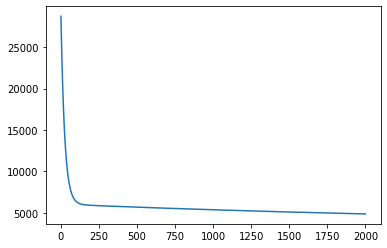

In [48]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [49]:
W, b

(array([ 23.94859061,  -1.69576644,  79.77071015,  59.42154193,
         22.46224061,  16.32803149, -47.71170225,  52.90146824,
         71.6470556 ,  50.38381743]),
 153.28001998746566)

## 10.  test 데이터에 대한 성능 확인하기

### test 데이터에 대한 성능을 확인해주세요.정의된 손실함수와 기울기 함수로 모델을 학습해주세요.


In [69]:
LL_train = loss(x_train, W, b, y_train)
LL_train

2894.9863348330905

In [70]:
LL = loss(x_test, W, b, y_test)
LL

2885.0006756542507

In [71]:
predictions = model(x_test, W, b)

In [72]:
MSE(y_test, predictions )

2885.0006756542507

In [73]:
gradient(x_test, W, b, y_test)

(array([ 0.8424707 ,  0.30765798,  0.49521811,  0.46335298, -0.79161676,
        -0.45665252, -0.56304037,  0.13084264, -0.50378884, -0.0888816 ]),
 -8.234938355805637)

## 11. 정답 데이터와 예측한 데이터 시각화하기

### x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.


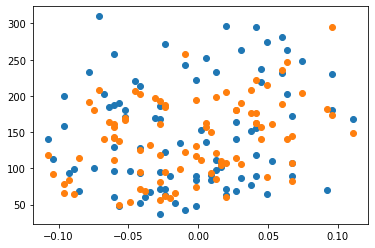

In [68]:
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], predictions)
plt.show()